# Carga un dataset de la libreria `pydataset` 

Puedes elegir la que más te guste! 

Hint: ten en cuenta que os pediremos que hagais algunas transformaciones usando `apply` y `groupby`! 

In [1]:
import pandas as pd
import numpy as np


pd.options.display.max_columns = None

In [2]:
pinch_variacion = pd.read_clipboard()
pinch_variacion.head(10)

,Variación T,kW
0,20,-436
1,250,0
2,83,-614
3,47,684
4,20,253
5,10,191
6,30,-82
7,15,-137


In [3]:
pinch = pd.read_clipboard()
pinch.head()

,Stream Name,Supply Temperature,Target Temperature,dT Min Contrib,Heat Capacity Flowrate,Supply Shift,Target Shift
0,2,25,100,10,1.68,35,110
1,4,100,60,10,6.42,90,50
2,16,147,500,10,21.80,157,510
3,15,500,90,10,21.80,490,80
4,17,25,230,10,7.46,35,240


# Explora el dataset elegido 

- Cuantas columnas tenemos
- Cuantos nulos
- Haz una descripción
- ¿Puedes homogeneizar el nombre de las columnas?

Tómate tu tiempo para entender el dataframe y la información que hay en el. Y escribe brevemente las conclusiones principales de el dataset elegido. 

**No te olvides de guardar tu nuevo csv limpio**

In [4]:
#Información básica dataframe:
pinch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Stream Name             5 non-null      int64  
 1   Supply Temperature      5 non-null      int64  
 2   Target Temperature      5 non-null      int64  
 3   dT Min Contrib          5 non-null      int64  
 4   Heat Capacity Flowrate  5 non-null      float64
 5   Supply Shift            5 non-null      int64  
 6   Target Shift            5 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 408.0 bytes


In [5]:
#Información proporcionada para determinar cálculos a realizar:
pinch.columns

Index(['Stream Name', 'Supply Temperature', 'Target Temperature',
       'dT Min Contrib', 'Heat Capacity Flowrate', 'Supply Shift',
       'Target Shift'],
      dtype='object')

In [6]:
#Accedemos a datos particulares de cada corriente:
pinch.loc[1,'Target Temperature'] #Esto seria muy útil para acceder a las T de descarga de las distintas bombas/equipos, facilitando diseño diagramas PyD.

pinch.loc[1 , ['Supply Temperature', 'Target Temperature']] #De esta forma podemos hacer lo mismo pero sabiendo T entrada y descarga, para saber si es necesario servicio auxiliar Q.

Supply Temperature    100.0
Target Temperature     60.0
Name: 1, dtype: float64

# Crea alguna función y aplícala a tu dataframe usando `apply`

In [7]:
def demand_surplus(x):
    '''
    Esta función va a obtener la necesidad o cesión de calor de una corriente a través de un int:
        x (int): kW corriente.
    
    return:
        un string indicando calidad servicio corriente.
    '''
    if x <= 0:
        return 'DEMAND'
    else:
        return 'SURPLUS'
    
pinch_variacion['Demand or Surplus'] = pinch_variacion['kW'].apply(demand_surplus)
pinch_variacion.head(10)

,Variación T,kW,Demand or Surplus
0,20,-436,DEMAND
1,250,0,DEMAND
2,83,-614,DEMAND
3,47,684,SURPLUS
4,20,253,SURPLUS
5,10,191,SURPLUS
6,30,-82,DEMAND
7,15,-137,DEMAND


In [8]:
#Creamos función para valorar cada tipo de corriente:

def tipo_corriente(x, y):
    '''
    Esta función va a extraer el tipo de una corriente de un int:
        x (int): Temperatura entrada corriente.
        y (int): Temperatura salida corriente.
    
    return:
        un string indicando tipo corriente.
    '''
    if x > y:
        return 'HOT'
    else:
        return 'COLD'

pinch['Tipo corriente'] = pinch.apply(lambda data: tipo_corriente(data['Supply Temperature'], data['Target Temperature']), axis = 1) 

pinch.head()

,Stream Name,Supply Temperature,Target Temperature,dT Min Contrib,Heat Capacity Flowrate,Supply Shift,Target Shift,Tipo corriente
0,2,25,100,10,1.68,35,110,COLD
1,4,100,60,10,6.42,90,50,HOT
2,16,147,500,10,21.80,157,510,COLD
3,15,500,90,10,21.80,490,80,HOT
4,17,25,230,10,7.46,35,240,COLD


In [15]:
#Calculamos el heat flow de cada corriente:

def heat_flow(x , y, z):
    '''
    Esta función extrae el heat flow, calor, de cada corriente a partir de dos int y un float:
        x(int): Temperatura entrada corriente.
        y(int): Temperatura salida corriente.
        z(float): Cp de cada corriente, capacidad calorífica.
    return:
        un float que representa el calor de cada corriente.
    '''
    return abs(z * (x - y))

pinch['Heat Flow'] = pinch.apply(lambda data: heat_flow(data['Supply Temperature'], data['Target Temperature'], data['Heat Capacity Flowrate']), axis = 1)

pinch.head()

,Stream Name,Supply Temperature,Target Temperature,dT Min Contrib,Heat Capacity Flowrate,Supply Shift,Target Shift,Tipo corriente,Heat Flow
0,2,25,100,10,1.68,35,110,COLD,126.0
1,4,100,60,10,6.42,90,50,HOT,256.8
2,16,147,500,10,21.80,157,510,COLD,7695.4
3,15,500,90,10,21.80,490,80,HOT,8938.0
4,17,25,230,10,7.46,35,240,COLD,1529.3


In [16]:
pinch.to_csv("datos/pinch_limpio.csv")

# Aplica el conocimiento del groupby en tu dataframe y saca algunas conclusiones (practica el *story telling*)

**BONUS** Plotea algunas de las conclusiones que hayas podido extraer

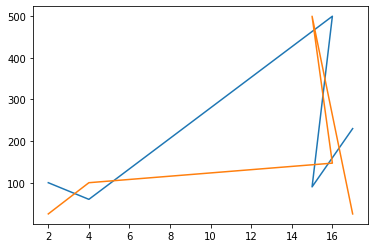

In [10]:
import matplotlib.pyplot as plt

plt.plot(pinch['Stream Name'], pinch['Target Temperature'])
plt.plot(pinch['Stream Name'], pinch['Supply Temperature'])

plt.show() #Al cruzarse se muestra que existe intercambio de calor entre corrientes.

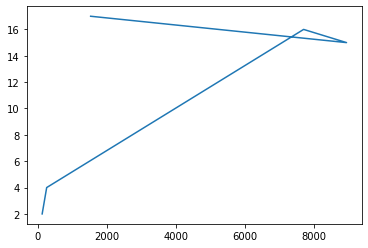

In [12]:
import matplotlib.pyplot as plt

plt.plot(pinch['Heat Flow'], pinch['Stream Name'])

plt.show() #Capacidad calorífica corriente.

In [18]:
pinch.groupby(['Stream Name']).agg([np.mean,np.median]) #En el caso de este DataFrame no tiene mucho sentido trabajar con groupby

C:\Users\Pablo\AppData\Local\Temp/ipykernel_12524/2217280026.py:1: FutureWarning: ['Tipo corriente'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pinch.groupby(['Stream Name']).agg([np.mean,np.median])


Supply Temperature        Target Temperature         \
                          mean median               mean median   
Stream Name                                                       
2                         25.0   25.0              100.0  100.0   
4                        100.0  100.0               60.0   60.0   
15                       500.0  500.0               90.0   90.0   
16                       147.0  147.0              500.0  500.0   
17                        25.0   25.0              230.0  230.0   

            dT Min Contrib        Heat Capacity Flowrate        Supply Shift  \
                      mean median                   mean median         mean   
Stream Name                                                                    
2                     10.0   10.0                   1.68   1.68         35.0   
4                     10.0   10.0                   6.42   6.42         90.0   
15                    10.0   10.0                  21.80  21.80        490.0   
16                    10.0   10.0                  21.80  21.80        157.0   
17                    10.0   10.0                   7.46   7.46         35.0   

                   Target Shift        Heat Flow          
            median         mean median      mean  median  
Stream Name                                               
2             35.0        110.0  110.0     126.0   126.0  
4             90.0         50.0   50.0     256.8   256.8  
15           490.0         80.0   80.0    8938.0  8938.0  
16           157.0        510.0  510.0    7695.4  7695.4  
17            35.0        240.0  240.0    1529.3  1529.3